In [1]:
#! pip install translate
import pandas as pd, numpy as np, xlsxwriter, matplotlib.pyplot as plt, seaborn as sns, os, math
from datetime import datetime as dt
from openpyxl import load_workbook
from notifypy import Notify
notification = Notify()
from googletrans import Translator
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("\n*****Required libraries imported*****")


*****Required libraries imported*****


# Mention project raw data filename below

In [2]:
file_Name = 'cases_report_Tata Power - Prayagraj_all_(All States)_2024-07-11.csv'
exe_start = dt.now() # Recording execution start time

# Asking for project ID from the user
PID = input('Please provide PID of project = ')

Please provide PID of project =  PID/TATAP/2023/DI/0335


In [3]:
def csvORexcel():
    global path
    path = "C:\\Python\\read\\"+file_Name
    try:
        if file_Name.split('.')[-1].startswith('c'):
            df = pd.read_csv(path)
            return df
        elif file_Name.split('.')[-1].startswith('x'):
            df = pd.read_excel(path)
            return df
    except FileNotFoundError:
        print("The file name {0} has not found".format(path))

fn = file_Name

In [4]:
data0 = csvORexcel() # Reading exce/csv file
init_file_size = round(os.path.getsize(path)/1000000,2) # Getting excel file size
#data0 = pd.read_excel(r'C:\Users\akash\Documents\Haqdarshak\Work\Nassscom\1.0\cases_report__1_Nasscom1_uniques_till_27_Feb.xlsx', "Unique DI Data")
data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,Case Organization,Case District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen State,Citizen District,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID
0,EP02WVLC,22-Nov-2023,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Case Aborted,NaN,NaN,Not Suspected,UP - Tata Power - Prayagraj,PRAYAGRAJ,PN030UYV,Lal Singh Yadav,M,7.985114e+09,34.0,UTTAR PRADESH,PRAYAGRAJ,PG02S3HN,Yadav,ylal.singh,Lal Singh Yadav,Imran Husain,14267.0
1,EP02WVUH,22-Nov-2023,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Scheme/Document received,21-Dec-2023,21-Dec-2023,Not Suspected,UP - Tata Power - Prayagraj,PRAYAGRAJ,PN030V9C,गूंजना वर्मा,F,9.794507e+09,34.0,UTTAR PRADESH,PRAYAGRAJ,PG02S3RF,वर्मा,gunjana.verma,Gunjana,Imran Husain,13694.0
2,EP02WW6U,22-Nov-2023,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005U9,Case Aborted,NaN,NaN,Not Suspected,UP - Tata Power - Prayagraj,PRAYAGRAJ,PN030VKQ,Amit Kumar,M,9.919141e+09,34.0,UTTAR PRADESH,PRAYAGRAJ,PG02S42D,Kumar,gunjana.verma,Gunjana,Imran Husain,13694.0
3,EP02X34M,24-Nov-2023,Post Matric Scholarship for OBC Students_UP,SH000A23,Case Aborted,NaN,NaN,Not Suspected,UP - Tata Power - Prayagraj,PRAYAGRAJ,PN03122C,Saumya Vishwakarma,F,6.386686e+09,18.0,UTTAR PRADESH,PRAYAGRAJ,PG02SA8J,Vishwakarma,s.k.vishwakarma,Suneeta Vishwakarma,Imran Husain,13695.0
4,EP02XCG5,25-Nov-2023,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005U9,Case Aborted,NaN,NaN,Not Suspected,UP - Tata Power - Prayagraj,PRAYAGRAJ,PN031BJF,Prabha Vati,F,9.151561e+09,40.0,UTTAR PRADESH,PRAYAGRAJ,PG02SJHQ,Vati,gunjana.verma,Gunjana,Imran Husain,13694.0


In [5]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Case Id                1324 non-null   object 
 1   Createdon              1323 non-null   object 
 2   Scheme/Doc             1323 non-null   object 
 3   Scheme/Doc GUID        1323 non-null   object 
 4   Status                 1323 non-null   object 
 5   Docket Submitted Date  1127 non-null   object 
 6   Benefit received Date  1079 non-null   object 
 7   HD Suspected Cases     1323 non-null   object 
 8   Case Organization      1323 non-null   object 
 9   Case District          1323 non-null   object 
 10  Citizen GUID           1323 non-null   object 
 11  Citizen Name           1323 non-null   object 
 12  Gender                 1323 non-null   object 
 13  Mobile                 1323 non-null   float64
 14  Age                    1323 non-null   float64
 15  Citi

In [6]:
states = {'AP':'Andhra Pradesh',
'AR':'Arunachal Pradesh',
'AS':'Assam',
'BR':'Bihar',
'BH':'Bihar',
'CT':'Chhattisgarh',
'CG':'Chhattisgarh',
'DL':'Delhi', 
'GA':'Goa',
'GJ':'Gujarat',
'HR':'Haryana',
'HP':'Himachal Pradesh',
'JH':'Jharkhand',
'KA':'Karnataka',
'KL':'Kerala',
'MP':'Madhya Pradesh',
'MH':'Maharashtra',
'MN':'Manipur',
'ML':'Meghalaya',
'MZ':'Mizoram',
'NL':'Nagaland',
'OR':'Odisha',
'PB':'Punjab',
'RJ':'Rajasthan',
'SK':'Sikkim',
'TN':'Tamil Nadu',
'TG':'Telangana',
'TR':'Tripura',
'UP':'Uttar Pradesh',
'UT':'Uttarakhand',
'WB':'West Bengal'}

# Data Cleaning

In [7]:
# Remove last row.
data0.drop(index = data0[data0.Createdon.isna()].index, inplace=True)

# Replace null values
data0['Scheme/Doc'].fillna('a', inplace=True)
data0['Citizen Name'].fillna('a', inplace=True)
data0['HD Name'].fillna('blank', inplace=True)
data0.Mobile.fillna(0, inplace=True)

# Changing status values and keeping only "Open/Submit/BR"
data0['Status'] = data0['Status'].apply(lambda x: 'Open' if x == 'Data complete' else 'Submitted' if (x=='Docket submitted' or x=='Document ready') else "Benefit Received" if x=='Scheme/Document received' else x)

# Changing Case Organization values from state initials to full state name.
data0['Case Organization'] = data0['Case Organization'].apply(lambda x: states[x[:2]])

# Renaming column "Case Organiisation" & "Case District" to "State" & "Disctrict"
data0.rename(columns={"Case Organization":"State","Case District":"District"}, inplace=True)

# Convert Mobile column from float to string for concatenation.
data0['Mobile'] = data0['Mobile'].apply(lambda x: str(x).strip())
#data0['Mobile'] = data0['Mobile'].astype('int64')
data0['Mobile'] = data0['Mobile'].astype('str')

# Change gender from initial letter to full form.
data0['Gender'] = data0['Gender'].apply(lambda x: 'Male' if x=='M' else 'Female' if x=='F' else 'Other' if x=='O' else x)

# Convert "Createdon", "Docket Submitted Date", "Benefit received Date" column data type to Datetime format
dt_col = ['Createdon', 'Docket Submitted Date', 'Benefit received Date', 'DOB']

for col in dt_col:
    try:
        data0[col] = pd.to_datetime(data0[col], format='mixed', errors='ignore')
    except KeyError:
        continue

# Deleting records with status "Case Aborted" and "Application rejected"
rejectedDF = data0[(data0.Status == 'Case Aborted') | (data0.Status == 'Application rejected')] # Storing prev step deleted data
data0 = data0[(data0['Status'] != 'Case Aborted') & (data0['Status'] != 'Application rejected')]

data0.reset_index(inplace=True, drop=True)
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Case Id                1176 non-null   object        
 1   Createdon              1176 non-null   datetime64[ns]
 2   Scheme/Doc             1176 non-null   object        
 3   Scheme/Doc GUID        1176 non-null   object        
 4   Status                 1176 non-null   object        
 5   Docket Submitted Date  1121 non-null   datetime64[ns]
 6   Benefit received Date  1074 non-null   datetime64[ns]
 7   HD Suspected Cases     1176 non-null   object        
 8   State                  1176 non-null   object        
 9   District               1176 non-null   object        
 10  Citizen GUID           1176 non-null   object        
 11  Citizen Name           1176 non-null   object        
 12  Gender                 1176 non-null   object        
 13  Mob

# Translate local language district name to English

### Custom translator

In [8]:
def Trans(x):
    t = Translator()
    attempt = 0
    max_attempts = 5
    alph = [chr(i) for i in range(65,122)]

    while attempt < max_attempts:
        if x[0] not in alph:
            try:
                xlated = t.translate(x)
                return xlated.text
            except AttributeError as e:
                if 'raise_Exception' in str(e):
                    print(f"Encountered rate limit error, attempt {attempt+1}/{max_attempts}. Retrying in 8 seconds...")
                    time.sleep(8)
                    attempt += 1
                else:
                    raise
            except Exception as e:
                print(e)
                break
            return "Failed to translate after multiple attempts."
        else:
            return x.title()

dist = {}

for d in data0['District'].value_counts().index:
    if d in dist.keys():
        break
    else:
        dist[d] = Trans(d)

dist

{'PRAYAGRAJ': 'Prayagraj'}

In [9]:
# Renaming Case District name from local language to english

data0['District'] = data0['District'].apply(lambda x: "Dohad" if x=="દોહદ" else "Haridwar" if x=="हरिद्वार" else "UDHAM SINGH NAGAR".title() if (x=="उदम सिंह नगर" or x=="Udam Singh Nagar" or x=="UDAM SINGH NAGAR")
                             else "Sitamarhi" if x=="सीतामढ़ी" else "Mahasamund" if (x=="महासमुंद" or x=="Mahasamand")
                             else "Rajgarh" if x=="राजगढ़" else "Muzaffarpur" if x=="मुजफ्फरपुर" else "Nawada" if x=="नवादा" else "Balrampur" if x=="बलरामपुर"
                             else "DAMOH".title() if x=="दमोह" else "Shravasti" if x=="श्रावस्ती" else "NARMADA".title() if x=="નર્મદા" else "Chhatarpur" if (x=="छतरपुर" or x=="Chhattarpur")
                             else 'East Singhbum' if x=='ईस्ट सिंघबम' else 'Chhindwara' if x=='छिंदवारा' else 'Jalna' if x=='जालना' else 'Dhule' if x=='धुळे' else "Dhanbad" if x=="धनबाद"
                             else 'Banas Kantha' if x=='બનાસ કાંઠા' else 'Dhamtari' if x=='धमतरी' else 'Bilaspur' if x=='बिलासपुर' else dist[x])

data0['District'].value_counts()

District
Prayagraj    1176
Name: count, dtype: int64

# Mention orgwise scheme applied raw data filename below

In [10]:
file_Name = 'orgwise_schemes_applied.xlsx'

In [11]:
# Importing Schemes data from Orgwise schemes applied report
schemeDetails = csvORexcel()
schemeDetails = schemeDetails[~schemeDetails['Parent Scheme GUID'].isna()]
schemeDetails = schemeDetails[schemeDetails['Project Id'] == PID]
schemeDetails.head()

,State,Org Name,Project Id,Scheme Id,status,Parent Scheme GUID,Parent Scheme,Scheme Name,Scheme type,Fee,Timeline,Benefit Value,Open,Submitted,Received
1168,Uttar Pradesh,UP - Tata Power - Prayagraj,PID/TATAP/2023/DI/0335,SH0009QJ,6,PSH000CWP,Updation of E-Shram Card,"E-Shram Update (Address, Phone number & Occupa...",sch,90,1,110033,273,255.0,255.0
1169,Uttar Pradesh,UP - Tata Power - Prayagraj,PID/TATAP/2023/DI/0335,SH0009HD,5,PDC0009K5,E-Shram Card,E-Shram Card (Central),sch,0,1,110033,103,101.0,101.0
1170,Uttar Pradesh,UP - Tata Power - Prayagraj,PID/TATAP/2023/DI/0335,SH0005U9,5,PSH0009KS,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,sch,0,Immediate,86564,433,422.0,422.0
1171,Uttar Pradesh,UP - Tata Power - Prayagraj,PID/TATAP/2023/DI/0335,DC0000Z5,5,PDC0009LO,BOCW card,UP-BOCW Construction Labour Card,sch,50,30,7721,1,1.0,1.0
1172,Uttar Pradesh,UP - Tata Power - Prayagraj,PID/TATAP/2023/DI/0335,SH0009RR,5,PSH0009SG,Yojana Card,Loyalty Yojana Card,sch,100,NaN,0,115,113.0,113.0


In [12]:
# Removing colomuns except 'Scheme Id','Scheme type','Benefit Value' to merge with main dataframe
for s in schemeDetails.columns:
    if s not in ['Scheme Id','Scheme type','Benefit Value','Parent Scheme']:
        schemeDetails.drop(columns=s, inplace=True)

# Merging scheme details with main dataframe to get data of Scheme type & Benefit Value.
data0 = data0.merge(schemeDetails.drop_duplicates(subset=['Scheme Id'], keep='last'), left_on='Scheme/Doc GUID', right_on="Scheme Id", how='left')

# Removing non required column "Scheme ID"
data0.drop(columns = 'Scheme Id', inplace=True)

# Changing short form to "Scheme" & "Document"
data0['Scheme type'] = data0['Scheme type'].apply(lambda x: 'Scheme' if x=='sch' else 'Document' if x=='doc' else x)

# Converting "Benefit Value" columns to integer type
data0['Benefit Value'].fillna('0', inplace=True)
data0['Benefit Value'] = data0['Benefit Value'].apply(lambda x: int(x) if x.isnumeric() else 0)
data0['Benefit Value'] = data0['Benefit Value'].astype('int64')

data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen State,Citizen District,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value
0,EP02WVUH,2023-11-22,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN030V9C,गूंजना वर्मा,Female,9794507364.0,34.0,UTTAR PRADESH,PRAYAGRAJ,PG02S3RF,वर्मा,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033
1,EP02YQ55,2023-11-30,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN031BFO,Vinod Kumar,Male,8957750177.0,38.0,UTTAR PRADESH,PRAYAGRAJ,PG02SJDZ,Kumar,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033
2,EP02YQ6T,2023-11-30,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN032NQQ,Nanhi Devi,Female,8957750177.0,36.0,UTTAR PRADESH,PRAYAGRAJ,PG02TV36,Devi,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033
3,EP02YQ8I,2023-11-30,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN030XUZ,Yashoda Verma,Female,7458939043.0,29.0,UTTAR PRADESH,PRAYAGRAJ,PG02S69Y,Verma,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033
4,EP02YQG7,2023-11-30,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN032O0C,Priti Priti,Female,8953510076.0,28.0,UTTAR PRADESH,PRAYAGRAJ,PG02TVD2,Priti,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033


In [13]:
# Checking if number of data point has increased or not
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Case Id                1176 non-null   object        
 1   Createdon              1176 non-null   datetime64[ns]
 2   Scheme/Doc             1176 non-null   object        
 3   Scheme/Doc GUID        1176 non-null   object        
 4   Status                 1176 non-null   object        
 5   Docket Submitted Date  1121 non-null   datetime64[ns]
 6   Benefit received Date  1074 non-null   datetime64[ns]
 7   HD Suspected Cases     1176 non-null   object        
 8   State                  1176 non-null   object        
 9   District               1176 non-null   object        
 10  Citizen GUID           1176 non-null   object        
 11  Citizen Name           1176 non-null   object        
 12  Gender                 1176 non-null   object        
 13  Mob

# Mention rate card raw data file name below

In [14]:
file_Name = 'rate_card.xlsx'

In [15]:
rate_card = csvORexcel()
rate_card = rate_card[rate_card['Org_PID'] == PID].sort_values('created_on')
rate_card.head()

,Org_PID,Org_Name,org_id,schemes_Guid,sch_name,sch id,ratecard_guid,open_price,Docket submitted price,scheme_document_received price,created_on
57990,PID/TATAP/2023/DI/0335,UP - Tata Power - Prayagraj,1208,SH0002UA,Aadhar Card linking to Mobile Phone (Central),3682,RC00PWA7,0.0,20.0,20.0,2023-11-07 11:02:36
58018,PID/TATAP/2023/DI/0335,UP - Tata Power - Prayagraj,1208,SH0007MV,Post Matric Scholarship for Scheduled Caste (S...,9895,RC00PWA7,0.0,20.0,20.0,2023-11-07 11:02:36
58019,PID/TATAP/2023/DI/0335,UP - Tata Power - Prayagraj,1208,SH0000VT,Post Matric Scholarship for Students belonging...,1145,RC00PWA7,0.0,20.0,20.0,2023-11-07 11:02:36
58020,PID/TATAP/2023/DI/0335,UP - Tata Power - Prayagraj,1208,SH0000PQ,Post Matric Scholarship for Students with Benc...,926,RC00PWA7,0.0,20.0,20.0,2023-11-07 11:02:36
58021,PID/TATAP/2023/DI/0335,UP - Tata Power - Prayagraj,1208,SH000ABC,"Post-Matric Scholarship for OBC, EBC and DNT S...",13368,RC00PWA7,0.0,20.0,20.0,2023-11-07 11:02:36


In [16]:
# Defining a function for HD payment calculation which will take cases report and rate card as input and return final cases report with hd payment column

def hdPayment(data0, rate_card):
    price = {'index':[], 'Scheme/Doc GUID':[], 'open_price':[], 'Docket submitted price':[], 'scheme_document_received price':[]} # Declaring a blank dictionary for storing price.
    
    for SID, di in zip(data0['Scheme/Doc GUID'], data0['Scheme/Doc GUID'].index): # Getting Scheme GUID and index number from schemes data.
        price['Scheme/Doc GUID'].append(SID) # Storing Scheme GUID from schemes data.
        price['index'].append(di) # Storing index number from schemes data.
        rate_sch = rate_card[rate_card.schemes_Guid == SID].sort_values('created_on') # Storing scheme GUID based filtered data from rate_card.
        rate_sch['created_on'] = rate_sch.created_on.apply(lambda x: x.strftime("%d-%m-%Y"))
        for d in rate_sch:
            date_sch = rate_card[rate_card.created_on == d].sort_values('created_on')
            if date_sch.shape[0] > 1:
                rate_sch.drop(index = date_sch.index.min(), inplace=True)
        rate_sch.created_on = pd.to_datetime(rate_sch.created_on, format='mixed', errors='ignore')
        if rate_sch.shape[0] > 1: # Checking if filtered data has more than 1 results.
            for i in rate_sch.index: # Iterating through filtered results.
                if data0.Createdon.loc[di] >= rate_sch.created_on.iloc[-1]: # Checking if cases created date is later than the rate card defined date.
                    price['open_price'].append(rate_sch.open_price.iloc[-1]) # Storing open price from rate card to "price" dictionary.
                    price['Docket submitted price'].append(rate_sch['Docket submitted price'].iloc[-1]) # Storing DS price from rate card to "price" dictionary.
                    price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].iloc[-1]) # Storing BR price from rate card to "price" dictionary.
                    #print('for if = {0} >= {1}'.format(data0.Createdon.loc[di],rate_sch.created_on.iloc[-1]))
                    break
                elif data0.Createdon.loc[di] <= rate_sch.created_on.loc[i]: # Checking if cases created date is earlier than the rate card defined date.
                    price['open_price'].append(rate_sch.open_price.loc[i]) # Storing open price from rate card to "price" dictionary.
                    price['Docket submitted price'].append(rate_sch['Docket submitted price'].loc[i]) # Storing DS price from rate card to "price" dictionary.
                    price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].loc[i]) # Storing BR price from rate card to "price" dictionary.
                    #print('for elif = {0} <= {1}'.format(data0.Createdon.loc[di],rate_sch.created_on.loc[i]))
                    break
        else: # This will execute if filtered data has only single result.
            price['open_price'].append(rate_sch.open_price.loc[rate_sch.index[0]]) # Storing open price from rate card to "price" dictionary.
            price['Docket submitted price'].append(rate_sch['Docket submitted price'].loc[rate_sch.index[0]]) # Storing DS price from rate card to "price" dictionary.
            price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].loc[rate_sch.index[0]]) # Storing BR price from rate card to "price" dictionary.
            #print('if-else')
    
    price = pd.DataFrame(price) # Converting price dictionary to pandas dataframe.
    data0 = data0.merge(price.drop(columns=['Scheme/Doc GUID']), left_on=data0.index, right_on='index', how='left') # Merging "price" datafram with "cases report".
    data0.drop(columns=['index'], inplace=True) # Removing index column
    data0['HD_Payment'] = data0.open_price + data0['Docket submitted price'] + data0['scheme_document_received price'] # Adding column for HD payment.
    return data0

In [17]:
data0 = hdPayment(data0, rate_card)
rejectedDF = hdPayment(rejectedDF, rate_card)

In [18]:
data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen State,Citizen District,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment
0,EP02WVUH,2023-11-22,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN030V9C,गूंजना वर्मा,Female,9794507364.0,34.0,UTTAR PRADESH,PRAYAGRAJ,PG02S3RF,वर्मा,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033,0.0,20.0,20.0,40.0
1,EP02YQ55,2023-11-30,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN031BFO,Vinod Kumar,Male,8957750177.0,38.0,UTTAR PRADESH,PRAYAGRAJ,PG02SJDZ,Kumar,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033,0.0,20.0,20.0,40.0
2,EP02YQ6T,2023-11-30,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN032NQQ,Nanhi Devi,Female,8957750177.0,36.0,UTTAR PRADESH,PRAYAGRAJ,PG02TV36,Devi,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033,0.0,20.0,20.0,40.0
3,EP02YQ8I,2023-11-30,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN030XUZ,Yashoda Verma,Female,7458939043.0,29.0,UTTAR PRADESH,PRAYAGRAJ,PG02S69Y,Verma,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033,0.0,20.0,20.0,40.0
4,EP02YQG7,2023-11-30,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN032O0C,Priti Priti,Female,8953510076.0,28.0,UTTAR PRADESH,PRAYAGRAJ,PG02TVD2,Priti,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033,0.0,20.0,20.0,40.0


In [19]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Case Id                         1176 non-null   object        
 1   Createdon                       1176 non-null   datetime64[ns]
 2   Scheme/Doc                      1176 non-null   object        
 3   Scheme/Doc GUID                 1176 non-null   object        
 4   Status                          1176 non-null   object        
 5   Docket Submitted Date           1121 non-null   datetime64[ns]
 6   Benefit received Date           1074 non-null   datetime64[ns]
 7   HD Suspected Cases              1176 non-null   object        
 8   State                           1176 non-null   object        
 9   District                        1176 non-null   object        
 10  Citizen GUID                    1176 non-null   object        
 11  Citi

# DFL Schemes

- SH0009SW = Digital productivity Service_ Basic
- SH000BM6 = Digital productivity Service_Basic
- SH000AG6 = Digital Productivity Services_Advanced
- SH000A32 = Long Training on Digital & Financial Inclusion_Private
- SH0009SW = Short Training on Digital & Financial Inclusion_Private
- SH000AG6 = Digital Productivity Services and and employability training_Advanced

# Removing DFL data

In [20]:
# Adding column "Scheme Type" to differentiate Schemes and DFL
data0["Scheme Category"] = data0['Scheme/Doc GUID'].apply(lambda x: "DFL" if (x=="SH0009SW" or x=="SH000AG6" or x=="SH000A32" or x=="SH0009SW" or x=="SH000AG6" or x=="SH000BM6") else "E-Gov")
og_DF=data0.copy()
dfl = data0[(data0['Scheme/Doc GUID'] == 'SH0009SW') | (data0['Scheme/Doc GUID'] == 'SH000AG6') | (data0['Scheme/Doc GUID'] == 'SH000A32') | (data0['Scheme/Doc GUID']=='SH0009SW') | (data0['Scheme/Doc GUID']=='SH000AG6') | (data0['Scheme/Doc GUID']=='SH000BM6')]
data0 = data0[(data0['Scheme/Doc GUID'] != 'SH0009SW') & (data0['Scheme/Doc GUID'] != 'SH000AG6') & (data0['Scheme/Doc GUID'] != 'SH000A32') & (data0['Scheme/Doc GUID']!='SH0009SW') & (data0['Scheme/Doc GUID']!='SH000AG6') & (data0['Scheme/Doc GUID']!='SH000BM6')]
print("DFL Count={0}\nE-Gov Count={1}".format(len(dfl),len(data0)))

DFL Count=0
E-Gov Count=1176


In [21]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Case Id                         1176 non-null   object        
 1   Createdon                       1176 non-null   datetime64[ns]
 2   Scheme/Doc                      1176 non-null   object        
 3   Scheme/Doc GUID                 1176 non-null   object        
 4   Status                          1176 non-null   object        
 5   Docket Submitted Date           1121 non-null   datetime64[ns]
 6   Benefit received Date           1074 non-null   datetime64[ns]
 7   HD Suspected Cases              1176 non-null   object        
 8   State                           1176 non-null   object        
 9   District                        1176 non-null   object        
 10  Citizen GUID                    1176 non-null   object        
 11  Citi

# Duplicate Column

In [22]:
# Filling missing values of "Parent Scheme" from "Scheme/Doc" column
for i in data0[data0['Parent Scheme'].isna()].index:
    data0['Parent Scheme'][i] = data0['Scheme/Doc'][i]
    
# Creating column with name 'duplicate' by concatenation
data0['duplicate'] = data0['Scheme/Doc'] + data0['Citizen Name'] + data0['Mobile'] # Concatenation using scheme name
dfl['duplicate'] = dfl['Scheme/Doc'] + dfl['Citizen Name'] + dfl['Mobile']
data0['duplicate'] = data0['duplicate'].apply(lambda x: x.lower()) # Converting duplicate column in lower case because python considers ASCII values of each character while checking for duplicates.
dfl['duplicate'] = dfl['duplicate'].apply(lambda x: x.lower())
data0['parent_duplicate'] = data0['Parent Scheme'] + data0['Citizen Name'] + data0['Mobile'] # Concatenation using scheme name
data0['parent_duplicate'] = data0['parent_duplicate'].apply(lambda x: x.lower())
data0.Mobile = data0.Mobile.apply(lambda x : int(x.split('.')[0])) # Converting "Mobile" column to interger data type
#dfl.Mobile = dfl.Mobile.apply(lambda x : int(x.split('.')[0])) # Converting "Mobile" column to interger data type

data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen State,Citizen District,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment,Scheme Category,duplicate,parent_duplicate
0,EP02WVUH,2023-11-22,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN030V9C,गूंजना वर्मा,Female,9794507364,34.0,UTTAR PRADESH,PRAYAGRAJ,PG02S3RF,वर्मा,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033,0.0,20.0,20.0,40.0,E-Gov,"e-shram update (address, phone number & occupa...",updation of e-shram cardगूंजना वर्मा9794507364.0
1,EP02YQ55,2023-11-30,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN031BFO,Vinod Kumar,Male,8957750177,38.0,UTTAR PRADESH,PRAYAGRAJ,PG02SJDZ,Kumar,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033,0.0,20.0,20.0,40.0,E-Gov,"e-shram update (address, phone number & occupa...",updation of e-shram cardvinod kumar8957750177.0
2,EP02YQ6T,2023-11-30,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN032NQQ,Nanhi Devi,Female,8957750177,36.0,UTTAR PRADESH,PRAYAGRAJ,PG02TV36,Devi,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033,0.0,20.0,20.0,40.0,E-Gov,"e-shram update (address, phone number & occupa...",updation of e-shram cardnanhi devi8957750177.0
3,EP02YQ8I,2023-11-30,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN030XUZ,Yashoda Verma,Female,7458939043,29.0,UTTAR PRADESH,PRAYAGRAJ,PG02S69Y,Verma,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033,0.0,20.0,20.0,40.0,E-Gov,"e-shram update (address, phone number & occupa...",updation of e-shram cardyashoda verma7458939043.0
4,EP02YQG7,2023-11-30,"E-Shram Update (Address, Phone number & Occupa...",SH0009QJ,Benefit Received,2023-12-21,2023-12-21,Not Suspected,Uttar Pradesh,Prayagraj,PN032O0C,Priti Priti,Female,8953510076,28.0,UTTAR PRADESH,PRAYAGRAJ,PG02TVD2,Priti,gunjana.verma,Gunjana,Imran Husain,13694.0,Updation of E-Shram Card,Scheme,110033,0.0,20.0,20.0,40.0,E-Gov,"e-shram update (address, phone number & occupa...",updation of e-shram cardpriti priti8953510076.0


In [23]:
dfl.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen State,Citizen District,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment,Scheme Category,duplicate


# Duplicate Data

In [24]:
# Checking number of all duplicate records
duplicateData = data0[data0.duplicated(['duplicate'],keep=False)].sort_values('duplicate')
parentDuplicateData = data0[data0.duplicated(['parent_duplicate'],keep=False)].sort_values('parent_duplicate')
dflDuplicates = dfl[dfl.duplicated(['duplicate'],keep=False)].sort_values('duplicate')
duplicateData = pd.concat([duplicateData,dflDuplicates], ignore_index=True)
duplicateData.reset_index(inplace=True, drop = True)

try:
    duplicateData.drop(index=duplicateData.index[-1], inplace=True)
except IndexError:
    print(duplicateData.shape)

duplicateData.shape

(17, 33)

# Unique Data

In [25]:
# Keeping uniques excluding duplicates
#unique_data = data0.drop(index = data0[data0.duplicated(['duplicate'], keep='last')].index)
unique_data = data0.drop(index = data0[data0.duplicated(['parent_duplicate'], keep='last')].index)
unique_data.reset_index(inplace=True, drop = True)

try:
    unique_data.drop(index=unique_data.index[-1], inplace=True)
except IndexError:
    print(unique_data.shape)

unique_data.shape

(1166, 33)

# For NASSCOM FOUNDATION 1.0 Only

#### Remove non listed district data

In [26]:
if 'Nasscom1.0_All' in fn:
    NoListDict = pd.DataFrame(unique_data['District'].value_counts(normalize=True).reset_index())
    for dist in list(NoListDict[NoListDict['proportion']<0.001].District):
        unique_data = unique_data[unique_data.District!=dist]
    unique_data.District.value_counts()

In [27]:
# Creating table citizen to scheme ratio.
cit_sch_ratio = pd.DataFrame(unique_data['Citizen GUID'].value_counts())
cit_sch_ratio.rename(columns={'count':'No of cases'}, inplace=True)
cit_sch_ratio.reset_index(inplace=True)
cit_sch_ratio.head()

,Citizen GUID,No of cases
0,PN03YLBK,4
1,PN03YL3M,4
2,PN03ZOBC,3
3,PN03Z9KV,3
4,PN03HV1R,3


In [28]:
# Merging no of cases with main project data.
unique_data = unique_data.merge(cit_sch_ratio.drop_duplicates(subset=['Citizen GUID']), on = 'Citizen GUID', how = 'left')
unique_data['No of cases'].fillna(0.0, inplace=True)
unique_data['No of cases'] = unique_data['No of cases'].astype('int64')
unique_data.reset_index(inplace=True, drop = True)
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Case Id                         1166 non-null   object        
 1   Createdon                       1166 non-null   datetime64[ns]
 2   Scheme/Doc                      1166 non-null   object        
 3   Scheme/Doc GUID                 1166 non-null   object        
 4   Status                          1166 non-null   object        
 5   Docket Submitted Date           1112 non-null   datetime64[ns]
 6   Benefit received Date           1065 non-null   datetime64[ns]
 7   HD Suspected Cases              1166 non-null   object        
 8   State                           1166 non-null   object        
 9   District                        1166 non-null   object        
 10  Citizen GUID                    1166 non-null   object        
 11  Citi

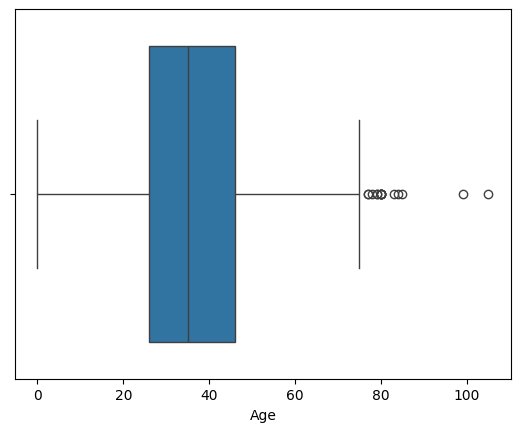

In [29]:
sns.boxplot(data=unique_data,x='Age')
plt.show()

# Project wise O / S / BR

,Status,Total Application
1,Open,54
2,Submitted,47
0,Benefit Received,1065
3,Grand Total,1166


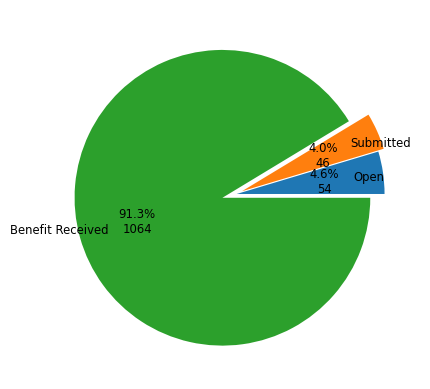

In [30]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{:d}".format(pct, absolute)

# Changing status values to O_S_BR
projectwise_O_S_BR = pd.DataFrame(unique_data.Status.value_counts())
projectwise_O_S_BR.rename(columns={'count':'Total Application'}, inplace=True)
projectwise_O_S_BR.reset_index(inplace=True)
projectwise_O_S_BR.loc[len(projectwise_O_S_BR.index)] = ['Grand Total', projectwise_O_S_BR['Total Application'].sum()]
try:
    projectwise_O_S_BR = projectwise_O_S_BR.iloc[[1,2,0,3]]
    plt.pie(projectwise_O_S_BR['Total Application'][0:3], labels=projectwise_O_S_BR['Status'][0:3], rotatelabels=False, autopct=lambda pct: func(pct, projectwise_O_S_BR['Total Application'][0:3]), explode=[0.01,0.05,0.09], textprops={'fontsize' : 'small'}, labeldistance = 0.8)
except IndexError:
    projectwise_O_S_BR = projectwise_O_S_BR.iloc[[1,0,2]]
    plt.pie(projectwise_O_S_BR['Total Application'][0:2], labels=projectwise_O_S_BR['Status'][0:2], rotatelabels=True, autopct=lambda pct: func(pct, projectwise_O_S_BR['Total Application'][0:2]), explode=[0.01,0.05], textprops={'fontsize' : 'small'}, labeldistance = 0.8)

projectwise_O_S_BR

# Districtwise Count

In [31]:
districtWise = pd.pivot_table(data=unique_data, index='District', columns='Status', values='Case Id', aggfunc='count', fill_value=0).reset_index()

if 'Benefit Received' not in list(unique_data.Status.value_counts().index):
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Open'].sum(),districtWise['Submitted'].sum()]
    districtWise['Total'] = districtWise['Open']+districtWise['Submitted']
    districtWise = districtWise[['District', 'Open', 'Submitted', 'Total']]

elif 'Submitted' not in list(unique_data.Status.value_counts().index):
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Open'].sum()]
    districtWise['Total'] = districtWise['Benefit Received']+districtWise['Open']
    districtWise = districtWise[['District', 'Open', 'Benefit Received', 'Total']]

elif 'Open' not in list(unique_data.Status.value_counts().index):
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Submitted'].sum()]
    districtWise['Total'] = districtWise['Benefit Received']+districtWise['Submitted']
    districtWise = districtWise[['District', 'Submitted', 'Benefit Received', 'Total']]

else:
    districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Open'].sum(),districtWise['Submitted'].sum()]
    districtWise['Total'] = districtWise['Benefit Received']+districtWise['Submitted']+districtWise['Open']
    districtWise = districtWise[['District', 'Open', 'Submitted', 'Benefit Received', 'Total']]
    
    
districtWise

Status,District,Open,Submitted,Benefit Received,Total
0,Prayagraj,54,47,1065,1166
1,Grand Total,54,47,1065,1166


# Orgwise Scheme Diversity

,State,Total unique schemes,Total Applications,Shcemes with more than 10% application
0,Uttar Pradesh,18,1166,"[E-Shram Update (Address, Phone number & Occup..."


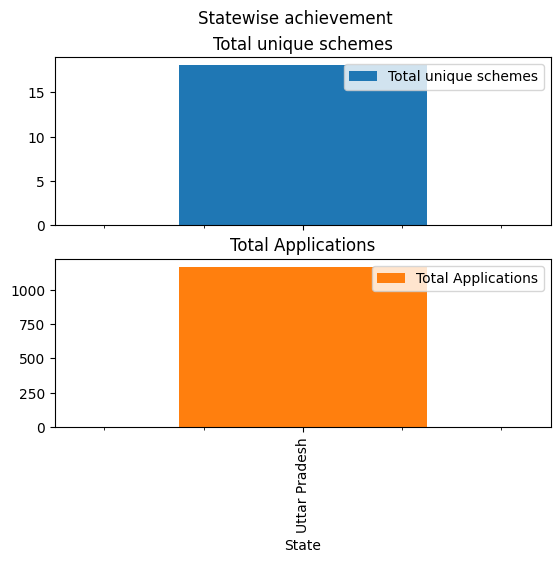

In [32]:
orgSchDiver = unique_data.pivot_table(index=['State','Scheme/Doc'], values='Case Id', aggfunc='count') # Pivoting unique data with "Case Organization" & "Scheme/Doc" rows and count of column "Case Id"
orgSchDiver.reset_index(inplace=True)
Orgwise_Scheme_Diversity = pd.DataFrame(orgSchDiver['State'].value_counts()).reset_index().rename(columns={'count':'Count of unique schemes'}).sort_values('State') # Converting pivot table to pandas data frame
Orgwise_Scheme_Diversity['Total Applications'] = orgSchDiver.groupby(by = 'State')['Case Id'].sum().values # Adding "Total no. of cases" column

'''# 18-35 - DFL Advance/Basic BR
digital_Adult = unique_data[(unique_data['Age'] >= 18) & (unique_data['Age'] <= 35) & (unique_data['Status'] == 'Benefit Received')]
digital_Adult = pd.pivot_table(data=digital_Adult, index = 'Scheme/Doc', values = 'Case Id', aggfunc='count').reset_index()
try:
    Orgwise_Scheme_Diversity['18-35 - DFL Advance/Basic BR'] = digital_Adult[(digital_Adult['Scheme/Doc'] == 'Digital productivity Service_ Basic') |
                                                                         (digital_Adult['Scheme/Doc'] == 'Digital Productivity Services_Advanced')].sum()[1]
except IndexError:
    Orgwise_Scheme_Diversity['18-35 - DFL Advance/Basic BR'] = digital_Adult[(digital_Adult['Scheme/Doc'] == 'Digital productivity Service_ Basic') |
                                                                         (digital_Adult['Scheme/Doc'] == 'Digital Productivity Services_Advanced')].sum()[0]'''

# Shcemes with more than 10% application
orgDict = {} # Declaring a empty dictionary to store Shcemes with more than 10% application
for org in Orgwise_Scheme_Diversity['State']:
    maxApp = pd.DataFrame(orgSchDiver[orgSchDiver['State'] == org].groupby('Scheme/Doc')['Case Id'].sum()
                          >
                          int(orgSchDiver[orgSchDiver['State'] == org]['Case Id'].sum()/10)) # Getting list of more then 10% application
    orgDict[org] = list(maxApp[maxApp['Case Id'] == True].index)
Orgwise_Scheme_Diversity['Shcemes with more than 10% application'] = orgDict.values() # Adding "Shcemes with more than 10% application" column

Orgwise_Scheme_Diversity.rename(columns={"Count of unique schemes":"Total unique schemes"}, inplace=True)
Orgwise_Scheme_Diversity[['State', 'Total unique schemes', 'Total Applications']].set_index('State').plot(kind='bar', title='Statewise achievement', subplots=True)
Orgwise_Scheme_Diversity

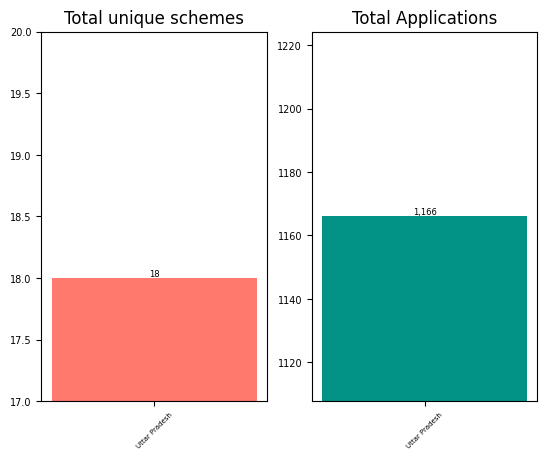

In [33]:
fig, ax = plt.subplots(1,2)
    
bar_container1 = ax[0].bar(Orgwise_Scheme_Diversity.State, Orgwise_Scheme_Diversity['Total unique schemes'], color = '#FF796C')
bar_container2 = ax[1].bar(Orgwise_Scheme_Diversity.State, Orgwise_Scheme_Diversity['Total Applications'], color = '#029386')

ax[0].tick_params(axis = 'y', labelsize = 7.0)
ax[1].tick_params(axis = 'y', labelsize = 7.0)

ax[0].bar_label(bar_container1, fmt='{:,.0f}', fontsize=6.0)
ax[1].bar_label(bar_container2, fmt='{:,.0f}', fontsize=6.0)

ax[0].set_xticklabels(Orgwise_Scheme_Diversity.State, fontsize=5.0, rotation=45)
ax[1].set_xticklabels(Orgwise_Scheme_Diversity.State, fontsize=5.0, rotation=45)

if len(Orgwise_Scheme_Diversity.State)>1:
    ax[0].set(title = 'Total unique schemes')
    ax[1].set(title = 'Total Applications')
else:
    ax[0].set(title = 'Total unique schemes', ylim = (math.floor(Orgwise_Scheme_Diversity['Total unique schemes'].sum())-1, math.ceil(Orgwise_Scheme_Diversity['Total unique schemes'].sum())+2))
    ax[1].set(title = 'Total Applications', ylim = (math.floor(Orgwise_Scheme_Diversity['Total Applications'].sum()), math.ceil(Orgwise_Scheme_Diversity['Total Applications'].sum())))

# Citizen Scheme Ratio

,Scheme Variety,Total Citizens,Total Cases
0,With 1 scheme,872,872
1,With 2 scheme,125,250
2,With 3 scheme,12,36
3,More than 3 schemes,2,8
4,Grand Total,1011,1166


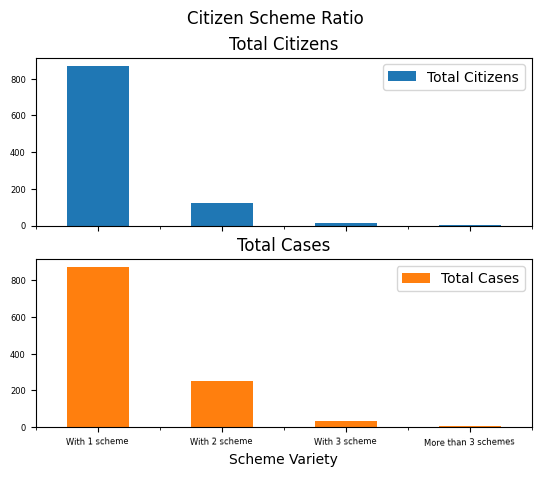

In [34]:
# Scheme variety wise application ratio
cit_sch_ratio = {'Scheme Variety':[],
                 'Total Citizens':[],
                 'Total Cases':[]}

no_of_cases = list(set(unique_data['No of cases'].value_counts().index))
no_of_case = []
no_of_cit = []
for n in no_of_cases:
    if n == 0:
        unique_data.drop(index=(unique_data[unique_data['No of cases'] == n].index), inplace=True)
    
    elif n>0 and n<=3:
        cit_sch_ratio['Scheme Variety'].append('With {0} scheme'.format(n))
        cit_sch_ratio['Total Citizens'].append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))
        cit_sch_ratio['Total Cases'].append(len(unique_data[unique_data['No of cases'] == n]))
    
    elif n>3:
        if 'More than 3 schemes' in cit_sch_ratio['Scheme Variety']:
            no_of_case.append(len(unique_data[unique_data['No of cases'] == n]))
            no_of_cit.append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))
            
        else:
            cit_sch_ratio['Scheme Variety'].append('More than 3 schemes')
            no_of_case.append(len(unique_data[unique_data['No of cases'] == n]))
            no_of_cit.append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))
    
    else:
        break

# Adding sum of cases and citizens against "More than 3 schemes"
if n>3:
    cit_sch_ratio['Total Cases'].append(sum(no_of_case))
    cit_sch_ratio['Total Citizens'].append(sum(no_of_cit))

# Grand Total
cit_sch_ratio['Scheme Variety'].append('Grand Total')
cit_sch_ratio['Total Citizens'].append(sum(cit_sch_ratio['Total Citizens']))
cit_sch_ratio['Total Cases'].append(sum(cit_sch_ratio['Total Cases']))

# More than 7 schemes
if len(unique_data[unique_data['No of cases'] >= 7]) > 0:
    cit_sch_ratio['Scheme Variety'].append('More than 7 schemes')
    cit_sch_ratio['Total Cases'].append(len(unique_data[unique_data['No of cases'] >= 7]))
    cit_sch_ratio['Total Citizens'].append(len(unique_data[unique_data['No of cases'] >= 7]['Citizen GUID'].value_counts()))

cit_sch_ratio = pd.DataFrame(cit_sch_ratio)
cit_sch_ratio[~(cit_sch_ratio['Scheme Variety']=='Grand Total')].set_index('Scheme Variety').plot.bar(title='Citizen Scheme Ratio', label = 1, subplots=True, logy=False, log=False, rot=True, fontsize=6, mouseover=True)
cit_sch_ratio

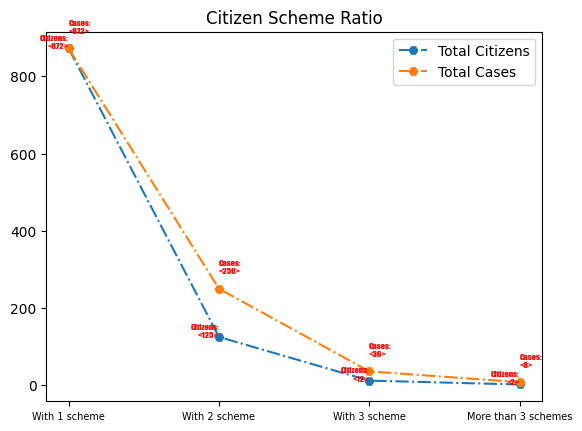

In [35]:
x = cit_sch_ratio[~(cit_sch_ratio['Scheme Variety']=='Grand Total')]

fig, ax = plt.subplots(1)

ax.plot(x['Scheme Variety'], x[['Total Citizens','Total Cases']], marker = 'H', linestyle = '-.', animated=True)
ax.set_xticklabels(labels=x['Scheme Variety'], fontdict={'fontsize':7.0})
ax.legend(['Total Citizens','Total Cases'])
ax.set(title = 'Citizen Scheme Ratio')
for i, (xi, yi, zi) in enumerate(zip(x['Scheme Variety'], x['Total Citizens'], x['Total Cases'])):
    ax.annotate(f'Citizens:\n<{yi}>', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='right', va='top', fontsize = 6.0, fontname='fantasy', color = 'red')
    ax.annotate(f'Cases:\n<{zi}>', (xi, zi), textcoords="offset points", xytext=(0, 10), ha='left', va='bottom', fontsize = 6.0, fontname='fantasy', color = 'red')

#ax.plot(x['Scheme Variety'], x['Total Cases'], marker = '*', linestyle = '-')
#for i, (xi, yi) in enumerate(zip(x['Scheme Variety'], x['Total Cases'])):
#    ax.annotate(f'{yi}', (xi, yi), textcoords="offset pints", xytext=(0, 10), ha='center', annotation_clip = True)

fig.show()

# Scheme Doc Ratio

,Scheme type,Unique Schemes,Total Applications,Total BV
0,Document,6,137,4923310
1,Scheme,12,1029,80132168


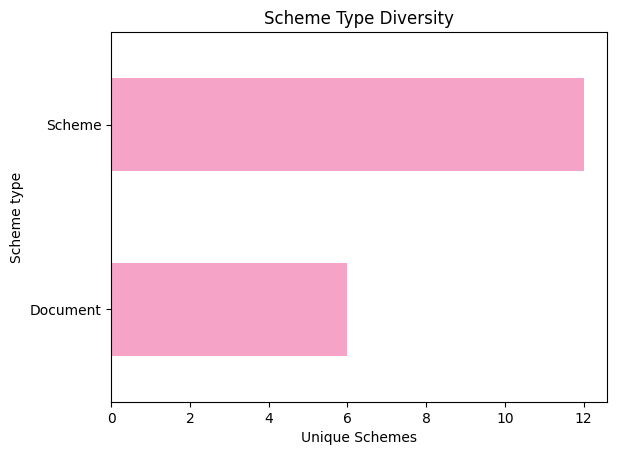

In [36]:
# Scheme type Total application
sch_doc_application = pd.DataFrame(unique_data.groupby(by = 'Scheme type')['Scheme/Doc'].count()).reset_index()
sch_doc_application.rename(columns={'Scheme/Doc' : 'Total Applications'}, inplace=True)

# Scheme type Total Benefit value
sch_doc_application['Total BV'] = list(unique_data.groupby(by ='Scheme type')['Benefit Value'].sum())

# Scheme type Total unique schemes
sch_doc_schemes = pd.DataFrame(unique_data.groupby(by = 'Scheme type')['Scheme/Doc'].value_counts()).reset_index().drop(columns='count')
sch_doc_schemes = pd.DataFrame(sch_doc_schemes.groupby(by='Scheme type')['Scheme/Doc'].count()).reset_index()
sch_doc_schemes.rename(columns={'Scheme/Doc' : 'Unique Schemes'}, inplace=True)

# Merging both tables
sch_doc_ratio = sch_doc_schemes.merge(sch_doc_application, on = 'Scheme type', how = 'left')
sch_doc_ratio[['Scheme type','Unique Schemes']].set_index('Scheme type').plot(kind='barh', title='Scheme Type Diversity', color='#F5A3C7', legend=False, xlabel="Unique Schemes")
sch_doc_ratio

# Top Bottom HD

In [37]:
step = unique_data.copy() # Copying data to another variable to make some changes.
step['HD ID'] = step['HD ID'].fillna('a') # Replacing missing values with simple character 'a'
step['HD ID'] = step['HD ID'].astype('str') # Changing HD ID column data type to string so that all values can be converted to lower case.
step['HD ID'] = step['HD ID'].apply(lambda x: x.lower()) # Changing values to lower case.
step1 = pd.pivot_table(data = step, index = ['HD ID', 'HD Name','Scheme/Doc GUID'], values = 'Case Id', aggfunc = 'count') # Pivoting to get unique HD ID/ HD Name/ Scheme Name
step1 = pd.DataFrame(step1.drop(columns='Case Id').reset_index()) # Delete unwanted column 'Case Id'
step1 = pd.DataFrame(pd.pivot_table(data=step1, index=['HD ID','HD Name'], values='Scheme/Doc GUID', aggfunc='count').reset_index()).rename(columns={'Scheme/Doc GUID' : 'Total unique schemes'}) # Pivoting to get unique HD ID/ HD Name and unique count of schemes.
step2 = pd.DataFrame(step.groupby(by = 'HD ID')['Case Id'].count()).reset_index().rename(columns={'Case Id' : 'Total Applications'})
step3 = step.groupby('HD ID')['Benefit Value'].sum().reset_index()
step4 = pd.pivot_table(data=step, index = ['HD ID'], values='HD_Payment', aggfunc='sum').reset_index().rename(columns = {'HD_Payment' : 'Total Payment'}) # Summing up HD payment
top_bottom_hd = step1.merge(step2, on = 'HD ID', how='left').merge(step3, on = 'HD ID', how='left').merge(step4, on = 'HD ID', how='left')
top_bottom_hd.rename(columns={'Benefit Value':'Benefit Value Delivered'}, inplace=True)
top_bottom_hd.loc[len(top_bottom_hd)] = ['Grand Total', '', top_bottom_hd['Total unique schemes'].sum(),
                                         top_bottom_hd['Total Applications'].sum(), top_bottom_hd['Benefit Value Delivered'].sum(), top_bottom_hd['Total Payment'].sum()]
top_bottom_hd.tail()

,HD ID,HD Name,Total unique schemes,Total Applications,Benefit Value Delivered,Total Payment
5,s.k.vishwakarma,Suneeta Vishwakarma,4,46,4103535,1560.0
6,sanjay.vishwakarma,Sanjay Kumar Vishwakarma,2,4,259692,120.0
7,vivek.nath,Vivek Nath,9,312,24978274,12480.0
8,ylal.singh,Lal Singh Yadav,1,2,220066,80.0
9,Grand Total,,65,1166,85055478,42040.0


# Scheme Categorisation

In [38]:
Scheme_Categorisation = pd.DataFrame(pd.pivot_table(data = unique_data, index=['Scheme type', 'Scheme/Doc', 'Benefit Value'], values='Case Id', aggfunc= 'count')).reset_index()
Scheme_Categorisation['Total BV Delivered'] = Scheme_Categorisation['Benefit Value']*Scheme_Categorisation['Case Id']
Scheme_Categorisation.rename(columns={'Case Id':'Total Applications'}, inplace=True)
Scheme_Categorisation.loc[len(Scheme_Categorisation)] = ['Grand Total', '', '', Scheme_Categorisation['Total Applications'].sum(), Scheme_Categorisation['Total BV Delivered'].sum()]
Scheme_Categorisation.tail()

,Scheme type,Scheme/Doc,Benefit Value,Total Applications,Total BV Delivered
14,Scheme,UP- MGNREGA Job Card,48961,2,97922
15,Scheme,UP-BOCW Construction Labour Card,7721,1,7721
16,Scheme,Widow Pension_UP,0,5,0
17,Scheme,Work demand under MGNREGA_UP,21300,85,1810500
18,Grand Total,,,1166,85055478


# Schemewise O/S/BR

In [39]:
Sch_O_S_BR = pd.pivot_table(data = unique_data, index='Scheme/Doc', columns='Status', values='Case Id', aggfunc='count', fill_value=0)
Sch_O_S_BR = pd.DataFrame(Sch_O_S_BR).reset_index()
if 'Benefit Received' not in Sch_O_S_BR.columns:
    if 'Submitted' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Open'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
    elif 'Open' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Submitted'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR.Total.sum()]
    else:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Submitted']]
        Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Submitted']].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR.Total.sum()]
elif 'Submitted' not in Sch_O_S_BR.columns:
    if 'Benefit Received' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Open'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
    elif 'Open' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Benefit Received']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Benefit Received'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
    else:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Benefit Received']]
        Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Benefit Received']].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
elif 'Open' not in Sch_O_S_BR.columns:
    if 'Benefit Received' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Submitted'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
    elif 'Submitted' not in Sch_O_S_BR.columns:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Benefit Received']] # Open' & 'Submitted
        Sch_O_S_BR['Total'] = Sch_O_S_BR['Benefit Received'].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
    else:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted', 'Benefit Received']]
        Sch_O_S_BR['Total'] = Sch_O_S_BR[['Submitted', 'Benefit Received']].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
else:
    Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Submitted', 'Benefit Received']]
    Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Submitted', 'Benefit Received']].sum(axis=1)
    Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(),  Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
    
Sch_O_S_BR.tail()

Status,Scheme/Doc,Open,Submitted,Benefit Received,Total
14,UP-Domicile Certificate,2,0,24,26
15,UP-Income Certificate,2,0,22,24
16,Widow Pension_UP,1,0,4,5
17,Work demand under MGNREGA_UP,2,39,44,85
18,Grand Total,54,47,1065,1166


# Gender Bifurcation

,Gender,Total Applications,% Contri.
0,Female,600,51.46
1,Male,565,48.46
2,Other,1,0.09
3,Total,1166,


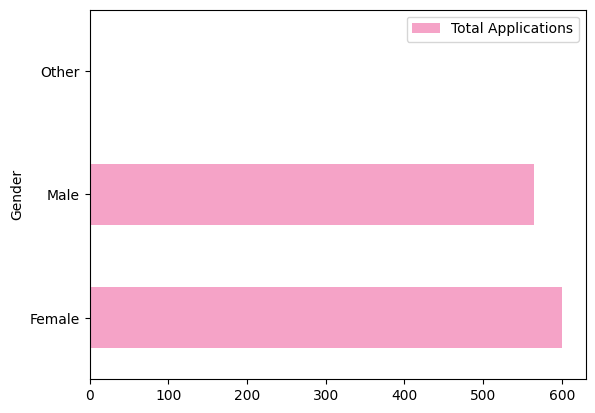

In [40]:
gen_Bif = pd.DataFrame(unique_data['Gender'].value_counts()).reset_index()
gen_Bif['% Contri.'] = round((gen_Bif['count']/unique_data['Gender'].value_counts().sum())*100,2)
gen_Bif.rename(columns={'count':'Total Applications'},inplace=True)
gen_Bif.loc[len(gen_Bif)] = ['Total', gen_Bif['Total Applications'].sum(), '']
if len(gen_Bif['Gender']) == 4:
    gen_Bif[['Gender', 'Total Applications']][0:3].set_index('Gender').plot(kind='barh', color='#F5A3C7')
elif len(gen_Bif['Gender']) == 3:
    gen_Bif[['Gender', 'Total Applications']][0:2].set_index('Gender').plot(kind='barh', color='#F5A3C7')
else:
    gen_Bif[['Gender', 'Total Applications']][0:1].set_index('Gender').plot(kind='barh', color='#F5A3C7')
gen_Bif

<Axes: >

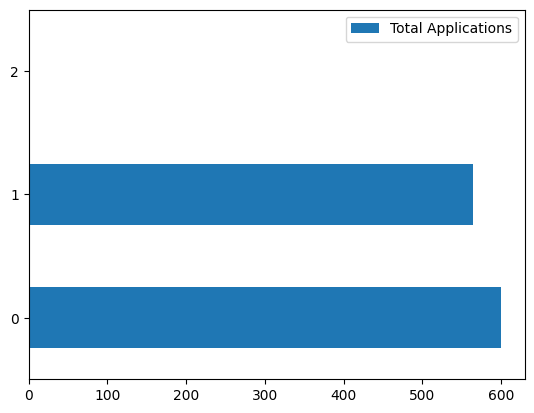

In [41]:
gen_Bif[['Gender', 'Total Applications']][0:3].plot.barh()

<BarContainer object of 3 artists>

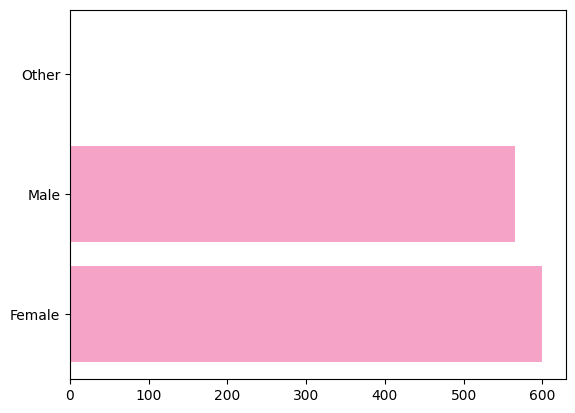

In [42]:
plt.barh(data = gen_Bif[['Gender', 'Total Applications']][0:3], y = gen_Bif['Gender'][0:3], width = gen_Bif['Total Applications'][0:3], color = '#F5A3C7')


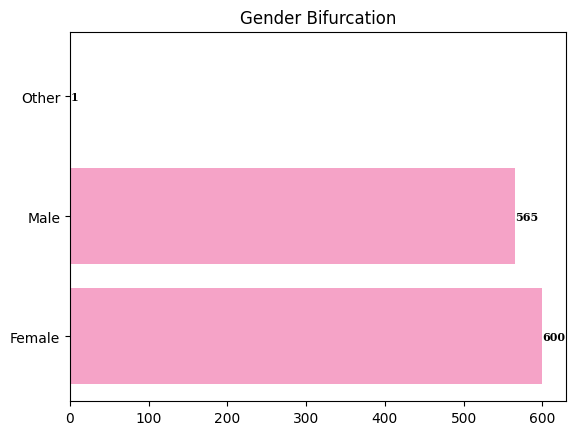

In [43]:
fig, ax = plt.subplots(1)

if len(gen_Bif['Gender']) == 4:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:3], y = gen_Bif['Gender'][0:3], width = gen_Bif['Total Applications'][0:3], color = '#F5A3C7')
elif len(gen_Bif['Gender']) == 3:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:2], y = gen_Bif['Gender'][0:2], width = gen_Bif['Total Applications'][0:2], color = '#F5A3C7')
else:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:1], y = gen_Bif['Gender'][0:1], width = gen_Bif['Total Applications'][0:1], color = '#F5A3C7')

ax.bar_label(bar_container, fmt='{:,.0f}', fontsize=8.0, fontfamily='serif', fontweight='bold')
ax.set(title = 'Gender Bifurcation')

fig.show()

# Centrewise Repeat Mobile numbers

In [44]:
repeat_mobile = pd.pivot_table(data=unique_data, index=['District', 'Mobile', 'Citizen GUID'], values='Case Id', aggfunc='count').sort_values(by='Case Id', ascending=False).reset_index()
repeat_mobile = pd.pivot_table(data=repeat_mobile, index=['District', 'Mobile'], values='Citizen GUID', aggfunc='count').sort_values(by='Citizen GUID', ascending=False).reset_index()
repeat_mobile = repeat_mobile[repeat_mobile['Citizen GUID']>30]
if repeat_mobile['Citizen GUID'].sum()>0:
    repeat_mobile.loc[len(repeat_mobile)] = ['Grand Total','',repeat_mobile['Citizen GUID'].sum()]
repeat_mobile.rename(columns={"Citizen GUID":"Total Citizens"}, inplace=True)
repeat_mobile.head()

,District,Mobile,Total Citizens
0,Prayagraj,7355452897,170
1,Prayagraj,6386245385,42
2,Prayagraj,8874935736,33
3,Grand Total,,245


# Agewise Citizen Distribution

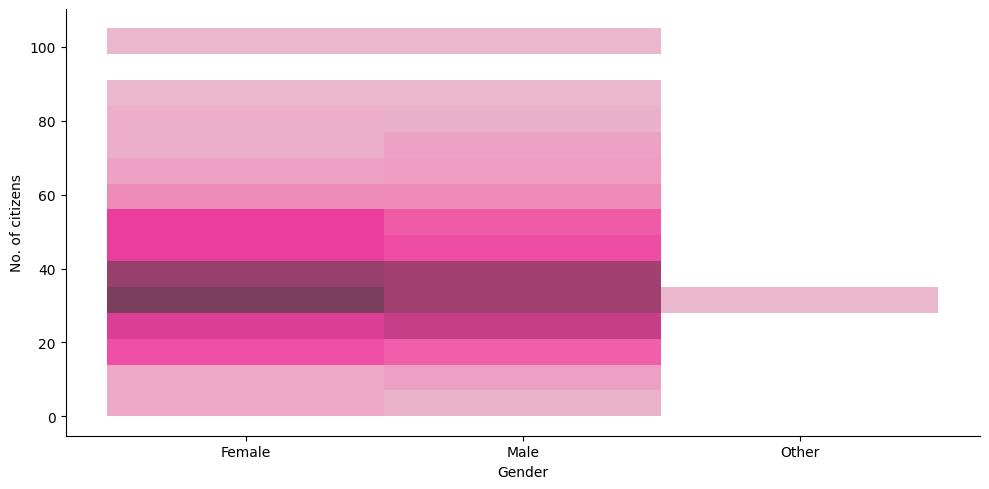

In [45]:
plot = sns.displot(data=unique_data, x='Gender', y='Age', kind='hist', bins=15, legend=True,  color='#F5A3C7', aspect=2)
plot.set(ylabel='No. of citizens')
plt.show()

# E-Gov and DFL Status Summary

In [46]:
eGov_DFL_Summary = pd.pivot_table(data=og_DF, index='District', columns=['Scheme Category','Status'], values='Case Id', aggfunc='count', fill_value=0)
eGov_DFL_Summary['Total'] = eGov_DFL_Summary.sum(axis = 1, numeric_only = 'True').values
eGov_DFL_Summary.sort_values(by='Total',ascending=False, inplace=True)
eGov_DFL_Summary.loc[len(eGov_DFL_Summary)] = eGov_DFL_Summary.sum(axis = 0, numeric_only = 'True').values
eGov_DFL_Summary.rename(index={eGov_DFL_Summary.index[-1]:'Grand Total'}, inplace=True)
eGov_DFL_Summary

Scheme Category            E-Gov                Total
Status          Benefit Received Open Submitted      
District                                             
Prayagraj                   1074   55        47  1176
Grand Total                 1074   55        47  1176

# Exporting data to Excel Sheets

In [47]:
# Exporting data of unique records to Excel file.
with pd.ExcelWriter('C:\\Python\\export\\'+fn.split('_')[2]+'_'+fn.split('_')[3]+' data.xlsx') as writer:
    unique_data.to_excel(writer, sheet_name='Schemes Data', index=False) # Exporting unique data
    projectwise_O_S_BR.to_excel(writer, sheet_name='projectwise_O_S_BR', index=False)
    districtWise.to_excel(writer, sheet_name='Districtwise achv', index=False)
    if repeat_mobile.shape[0]>0:
        repeat_mobile.to_excel(writer,sheet_name='Repeat_mobile_nos', index=False)
    Orgwise_Scheme_Diversity.to_excel(writer, sheet_name='Orgwise_Scheme_Diversity', index=False)
    cit_sch_ratio.to_excel(writer, sheet_name='Citizen_Scheme_Ratio', index=False)
    sch_doc_ratio.to_excel(writer, sheet_name='Scheme_Doc_Ratio', index=False)
    top_bottom_hd.to_excel(writer, sheet_name='Top_Bottom_HD', index=False)
    Scheme_Categorisation.to_excel(writer, sheet_name='Scheme_Categorisation', index=False)
    Sch_O_S_BR.to_excel(writer, sheet_name='Schwise_O_S_BR', index=False)
    gen_Bif.to_excel(writer, sheet_name='Gender_Bifurcation', index=False)
    if dfl.shape[0]>0:
        eGov_DFL_Summary.to_excel(writer, sheet_name='eGov_DFL_Status_Summary')
        dfl.to_excel(writer, sheet_name='DFL data', index=False)
    rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting rejected data
    duplicateData.to_excel(writer, sheet_name='Duplicate data', index=False) # Exporting duplicate data
    parentDuplicateData.to_excel(writer, sheet_name='Parent Sch Duplicate', index=False) # Exporting parent scheme duplicate data
    #plot.savefig(writer, sheet_name='Age_Dist')

exe_end = dt.now() # Recording execution end time
print('{0} project data exported to Excel!\nTotal {1} unique records exported.\nTotal {2} duplicate records exported.\nTotal {3} rejected records exported'.format(fn.split('_')[2]+' '+fn.split('_')[3],
                                                                                                                                                                   unique_data.shape[0],
                                                                                                                                                                   duplicateData.shape[0],
                                                                                                                                                                   rejectedDF.shape[0]))

Tata Power - Prayagraj all project data exported to Excel!
Total 1166 unique records exported.
Total 17 duplicate records exported.
Total 147 rejected records exported


# Logging the execution process

In [48]:
log = [init_file_size,exe_start.strftime("%d/%m/%Y %H:%M:%S"),exe_end.strftime("%d/%m/%Y %H:%M:%S"),int(round((exe_end-exe_start).total_seconds(),0)),fn.split('_')[2]+' '+fn.split('_')[3],unique_data.shape[0],duplicateData.shape[0],rejectedDF.shape[0]]

lwb = load_workbook(r'C:\Python\export\Logs Remove Duplicate for Dashboard-Manas Algo.xlsx') # Loading the workbook
lws = lwb.worksheets[0] # Setting the worksheet
lws.append(log) # Appending the log row
lwb.save(r'C:\Python\export\Logs Remove Duplicate for Dashboard-Manas Algo.xlsx') # Saving the logged data
print('Logging Done!\n',log)

Logging Done!
 [0.39, '11/07/2024 17:26:50', '11/07/2024 17:27:29', 39, 'Tata Power - Prayagraj all', 1166, 17, 147]


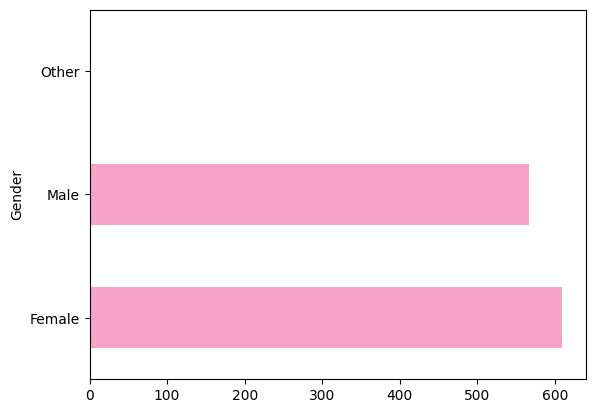

In [49]:
og_DF.Gender.value_counts().plot.barh(color='#F5A3C7')
plt.show()

In [50]:
og_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Case Id                         1176 non-null   object        
 1   Createdon                       1176 non-null   datetime64[ns]
 2   Scheme/Doc                      1176 non-null   object        
 3   Scheme/Doc GUID                 1176 non-null   object        
 4   Status                          1176 non-null   object        
 5   Docket Submitted Date           1121 non-null   datetime64[ns]
 6   Benefit received Date           1074 non-null   datetime64[ns]
 7   HD Suspected Cases              1176 non-null   object        
 8   State                           1176 non-null   object        
 9   District                        1176 non-null   object        
 10  Citizen GUID                    1176 non-null   object        
 11  Citi

# Exporting original transformed data to excel.

In [51]:
# Notifying user to give consent..
notification = Notify()
notification.title = "Consent Required"
notification.message = "Hello Akash! Waiting for your consent."
notification.audio = "E:/Music/Ringtone/Consent required1.wav"
notification.send()

# Asking consent from user for original data export.
consent = input("Do you want to export original data? (Y/N)\n")

if consent in ["Y","y"]:
    with pd.ExcelWriter('C:\\Python\\export\\'+fn.split('_')[2]+'_'+fn.split('_')[3]+' og_data.xlsx') as writer:
        try:
            print("Exporting full data.")
            og_DF.to_excel(writer, sheet_name='Raw Data', index=False)
            rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting rejected data
            print("Export to excel success!")
        except ValueError:
            print("Full data export failed due to excel rows limit exceeded hence exporting data in part.")
            og_DF[og_DF['Scheme Category'] == 'E-Gov'].to_excel(writer, sheet_name='E-Gov', index=False)
            og_DF[og_DF['Scheme Category'] == 'DFL'].to_excel(writer, sheet_name='DFL', index=False)
            rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting rejected data
            print("Export to excel success!")
else:
    print("You dont want original data!")

Do you want to export original data? (Y/N)
 n


You dont want original data!


,Status,Total Application
2,Submitted,47
1,Open,55
0,Benefit Received,1074
3,Grand Total,1176


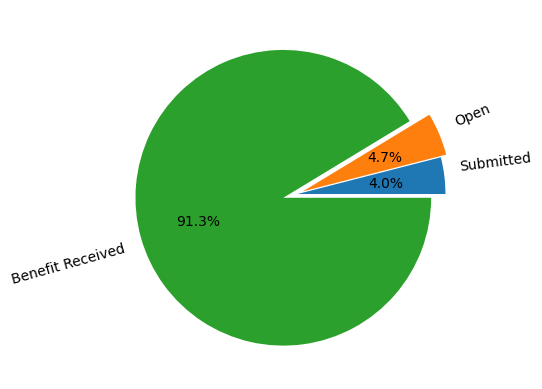

In [52]:
# Changing status values to O_S_BR
og_summary = pd.DataFrame(og_DF[og_DF['Scheme Category']=='E-Gov'].Status.value_counts())
og_summary.rename(columns={'count':'Total Application'}, inplace=True)
og_summary.reset_index(inplace=True)
og_summary.loc[len(og_summary.index)] = ['Grand Total', og_summary['Total Application'].sum()]
try:
    og_summary = og_summary.iloc[[2,1,0,3]]
    plt.pie(og_summary['Total Application'][0:3], labels=og_summary['Status'][0:3], rotatelabels=True, autopct="%1.1f%%", explode=[0.01,0.05,0.09])
except IndexError:
    og_summary = og_summary.iloc[[1,0,2]]
    plt.pie(og_summary['Total Application'][0:2], labels=og_summary['Status'][0:2], rotatelabels=True, autopct="%1.1f%%", explode=[0.01,0.05])
og_summary

# Notifying user using Notification

In [53]:
notification.title = "Process Execution Alert"
notification.message = "Hello Akash! Python script execution has completed."
notification.audio = "E:/Music/Ringtone/Process Execution Alert.wav"
notification.send(block=False)
print('Script execution completed!')

Script execution completed!
